# SLEEP HEALTH AND LIFESTYLE ANALYSIS (EDA)

### SUMBER DATA DARI :
#### https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?datasetId=3321433

### Ikhtisar Kumpulan Data:
##### Kumpulan Data Kesehatan Tidur dan Gaya Hidup terdiri dari 400 baris dan 13 kolom, yang mencakup berbagai variabel terkait tidur dan kebiasaan sehari-hari. Ini mencakup rincian seperti jenis kelamin, usia, pekerjaan, durasi tidur, kualitas tidur, tingkat aktivitas fisik, tingkat stres, kategori BMI, tekanan darah, detak jantung, langkah harian, dan ada tidaknya gangguan tidur.

### Fitur Utama dari Kumpulan Data:
##### Metrik Tidur Komprehensif: Jelajahi durasi, kualitas, dan faktor tidur yang memengaruhi pola tidur.
##### Faktor Gaya Hidup: Analisis tingkat aktivitas fisik, tingkat stres, dan kategori BMI.
##### Kesehatan Kardiovaskular: Periksa pengukuran tekanan darah dan detak jantung.
##### Analisis Gangguan Tidur: Mengidentifikasi terjadinya gangguan tidur seperti Insomnia dan Sleep Apnea.

### Kolom Kumpulan Data:
##### ID Orang: Pengidentifikasi untuk setiap individu.
##### Jenis Kelamin: Jenis kelamin orang tersebut (Pria/Wanita).
##### Usia: Usia seseorang dalam tahun.
##### Pekerjaan: Pekerjaan atau profesi orang tersebut.
##### Durasi Tidur (jam): Jumlah jam seseorang tidur per hari.
##### Kualitas Tidur (skala: 1-10): Penilaian subjektif terhadap kualitas tidur, berkisar antara 1 hingga 10.
##### Tingkat Aktivitas Fisik (menit/hari): Jumlah menit seseorang melakukan aktivitas fisik setiap hari.
##### Tingkat Stres (skala: 1-10): Peringkat subjektif dari tingkat stres yang dialami seseorang, berkisar antara 1 hingga 10.
##### Kategori BMI: Kategori BMI seseorang (misalnya, Berat Badan Kurang, Normal, Kelebihan Berat Badan).
##### Tekanan Darah (sistolik/diastolik): Pengukuran tekanan darah seseorang, ditunjukkan sebagai tekanan sistolik dibandingkan tekanan diastolik.
##### Denyut Jantung (bpm): Denyut jantung istirahat seseorang dalam detak per menit.
##### Langkah Harian: Jumlah langkah yang dilakukan seseorang per hari.
##### Gangguan Tidur: Ada tidaknya gangguan tidur pada orang tersebut (Tidak Ada, Insomnia, Sleep Apnea).

#### 

#### 

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gathering Data

In [70]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Assesment Data 

In [71]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


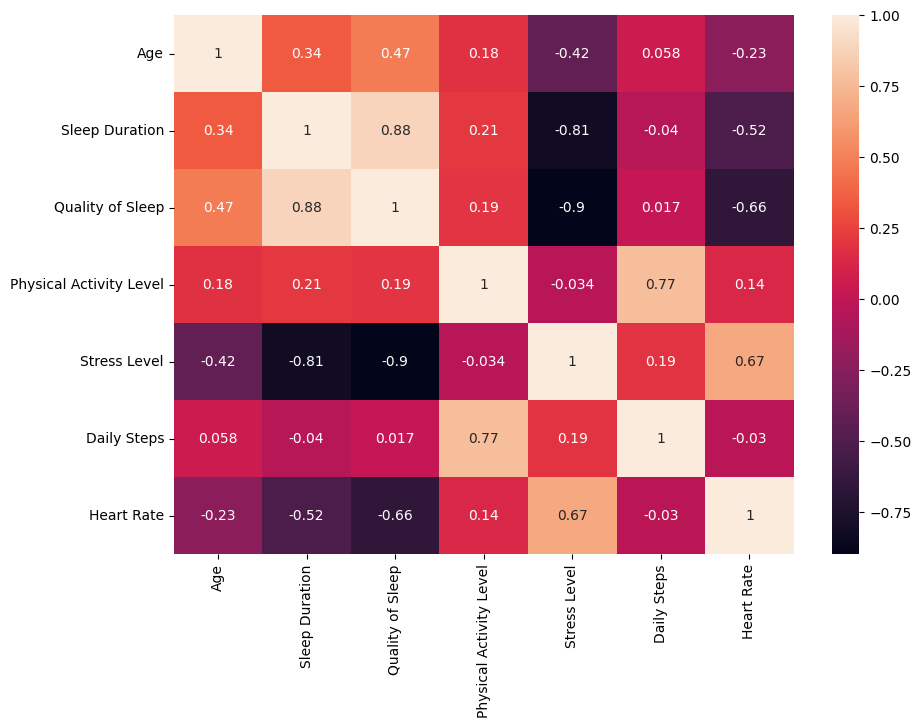

In [72]:
column = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Daily Steps','Heart Rate']

plt.figure(figsize=(10,7))
sns.heatmap(df[column].corr(), annot=True)
plt.show()

In [73]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

#### Terdapat sejumlah 219 Missing Values pada kolom "Sleep Disorder". Namun hal ini tidak perlu langsung di singkirkan/hapus. Karena beberapa atribut lainya masih terisi. sehingga data yang hilang masih bisa di atasi.

In [74]:
na = df[df['Sleep Disorder'].isna()]
na.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


## Mengatasi data yang hilang menggunakan teknik Machine Learning yaitu klasifikasi (Clustering).
### Clustering adalah teknik Machine Learning Unsupervised. yang mana data akan mengelompokan sesuai Kmeans yang berdekatan. Hal ini cukup bisa mengatasi data yang hilang. kode di bawah ini, kita cukup menggunakan perbandingan antara score pada kolom 'Sleep Duration' dan 'Quality Of Sleep'.
### Mengapa demikian? alasan nya adalah, pada informasi visualisasi pada heatmap. skor hubungan setiap kolom memang data tidak ada yang berkorelasi. Namun, pada kolom 'Sleep Duration' dan 'Quality Of Sleep' memiliki hubungan yang cukup tingggi dari skor lainya, yaitu 0.88. Ini bisa menjadi modal kita dalam mengatasi hilangnya pada kolom 'Sleep Disorder'. Disini kita akan acukan berdasarkan y atau kualitas tidur. yang mana score nya dengan range 6 - 9

In [75]:
from sklearn.cluster import KMeans

x = na[['Sleep Duration','Quality of Sleep']]

clusters = []

for i in range(1, 5) :
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

<Axes: >

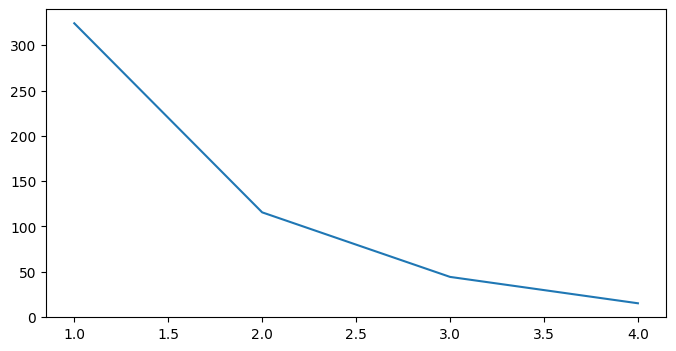

In [76]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,5)),y=clusters,ax=ax)

In [79]:
km5 = KMeans(n_clusters=3).fit(x)
x['labels'] = km5.labels_
km5.score(x)

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Acer\AppData\Local\Temp\ipykernel_5864\2146764952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['labels'] = km5.labels_


-221.1990546726662

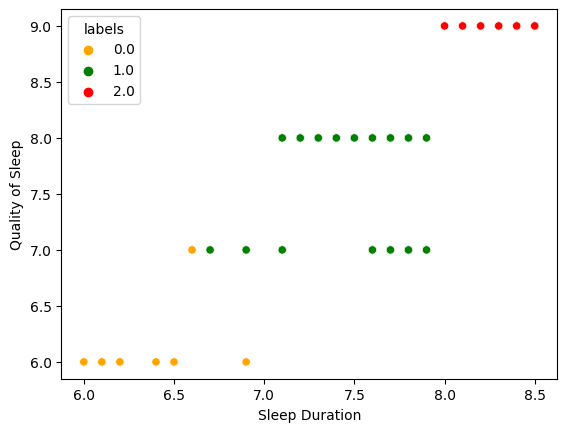

In [80]:
colors = ['Orange','Green','red']
plt.figure()
sns.scatterplot(x='Sleep Duration',y='Quality of Sleep',data=df, hue=x['labels'], palette=colors )
plt.show()

### Score pada data dikelompokan sebanyak 3 kategori. dan 0 mengindikasikan insomnia, 1 di indikasikan Sleep Apnea, 2 di indikasikan tidak memilki penyakit pada tidur (none).

In [81]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 359
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sleep Duration    219 non-null    float64
 1   Quality of Sleep  219 non-null    int64  
 2   labels            219 non-null    int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 14.1 KB


In [82]:
na['Sleep Disorder'] = x['labels']
na['Sleep Disorder'] = na['Sleep Disorder'].replace({0 : 'Insomnia', 1 : 'Sleep Apnea', 2 : 'None' })
df.dropna(inplace=True)
df = pd.concat([df,na])
df.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_5864\2788938672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na['Sleep Disorder'] = x['labels']
C:\Users\Acer\AppData\Local\Temp\ipykernel_5864\2788938672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na['Sleep Disorder'] = na['Sleep Disorder'].replace({0 : 'Insomnia', 1 : 'Sleep Apnea', 2 : 'None' })


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea


### Missing Values Sudah diatasi. Sekarang, kita akan eksplor data analysis

# EXPLORATORY DATA ANALYIS


In [83]:
df.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,374
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,3
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,217
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


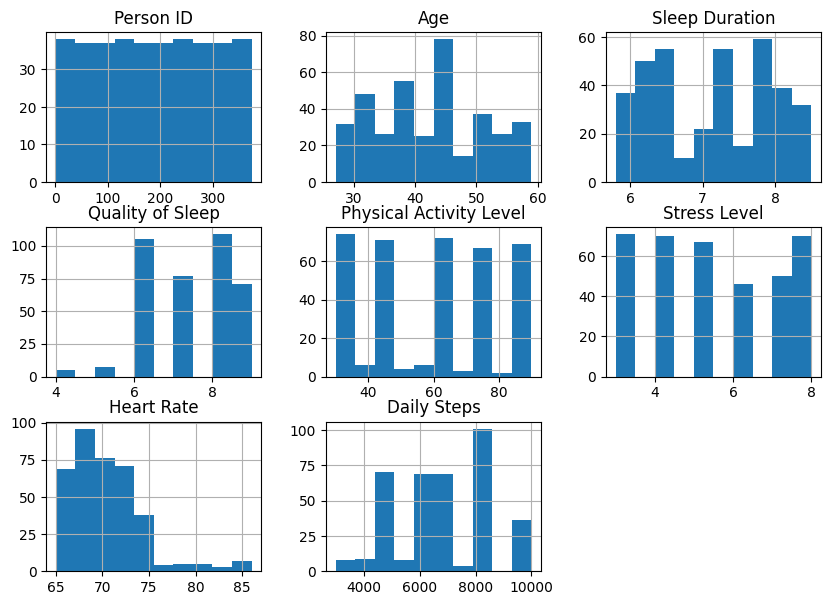

In [84]:
df.hist(figsize=(10,7))
plt.show()

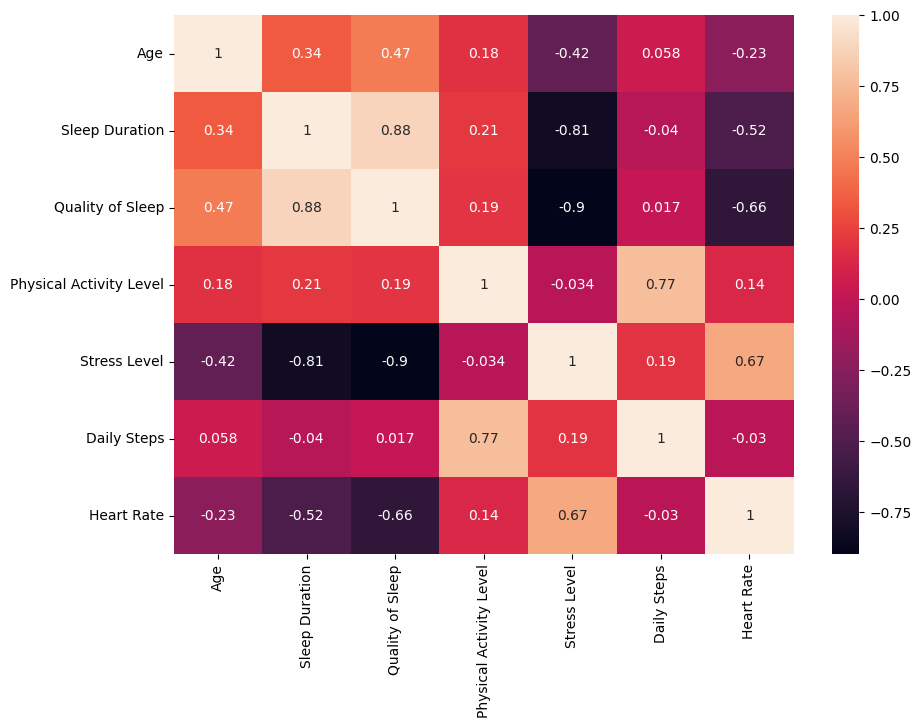

In [85]:
column = ['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Daily Steps','Heart Rate']

plt.figure(figsize=(10,7))
sns.heatmap(df[column].corr(), annot=True)
plt.show()

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


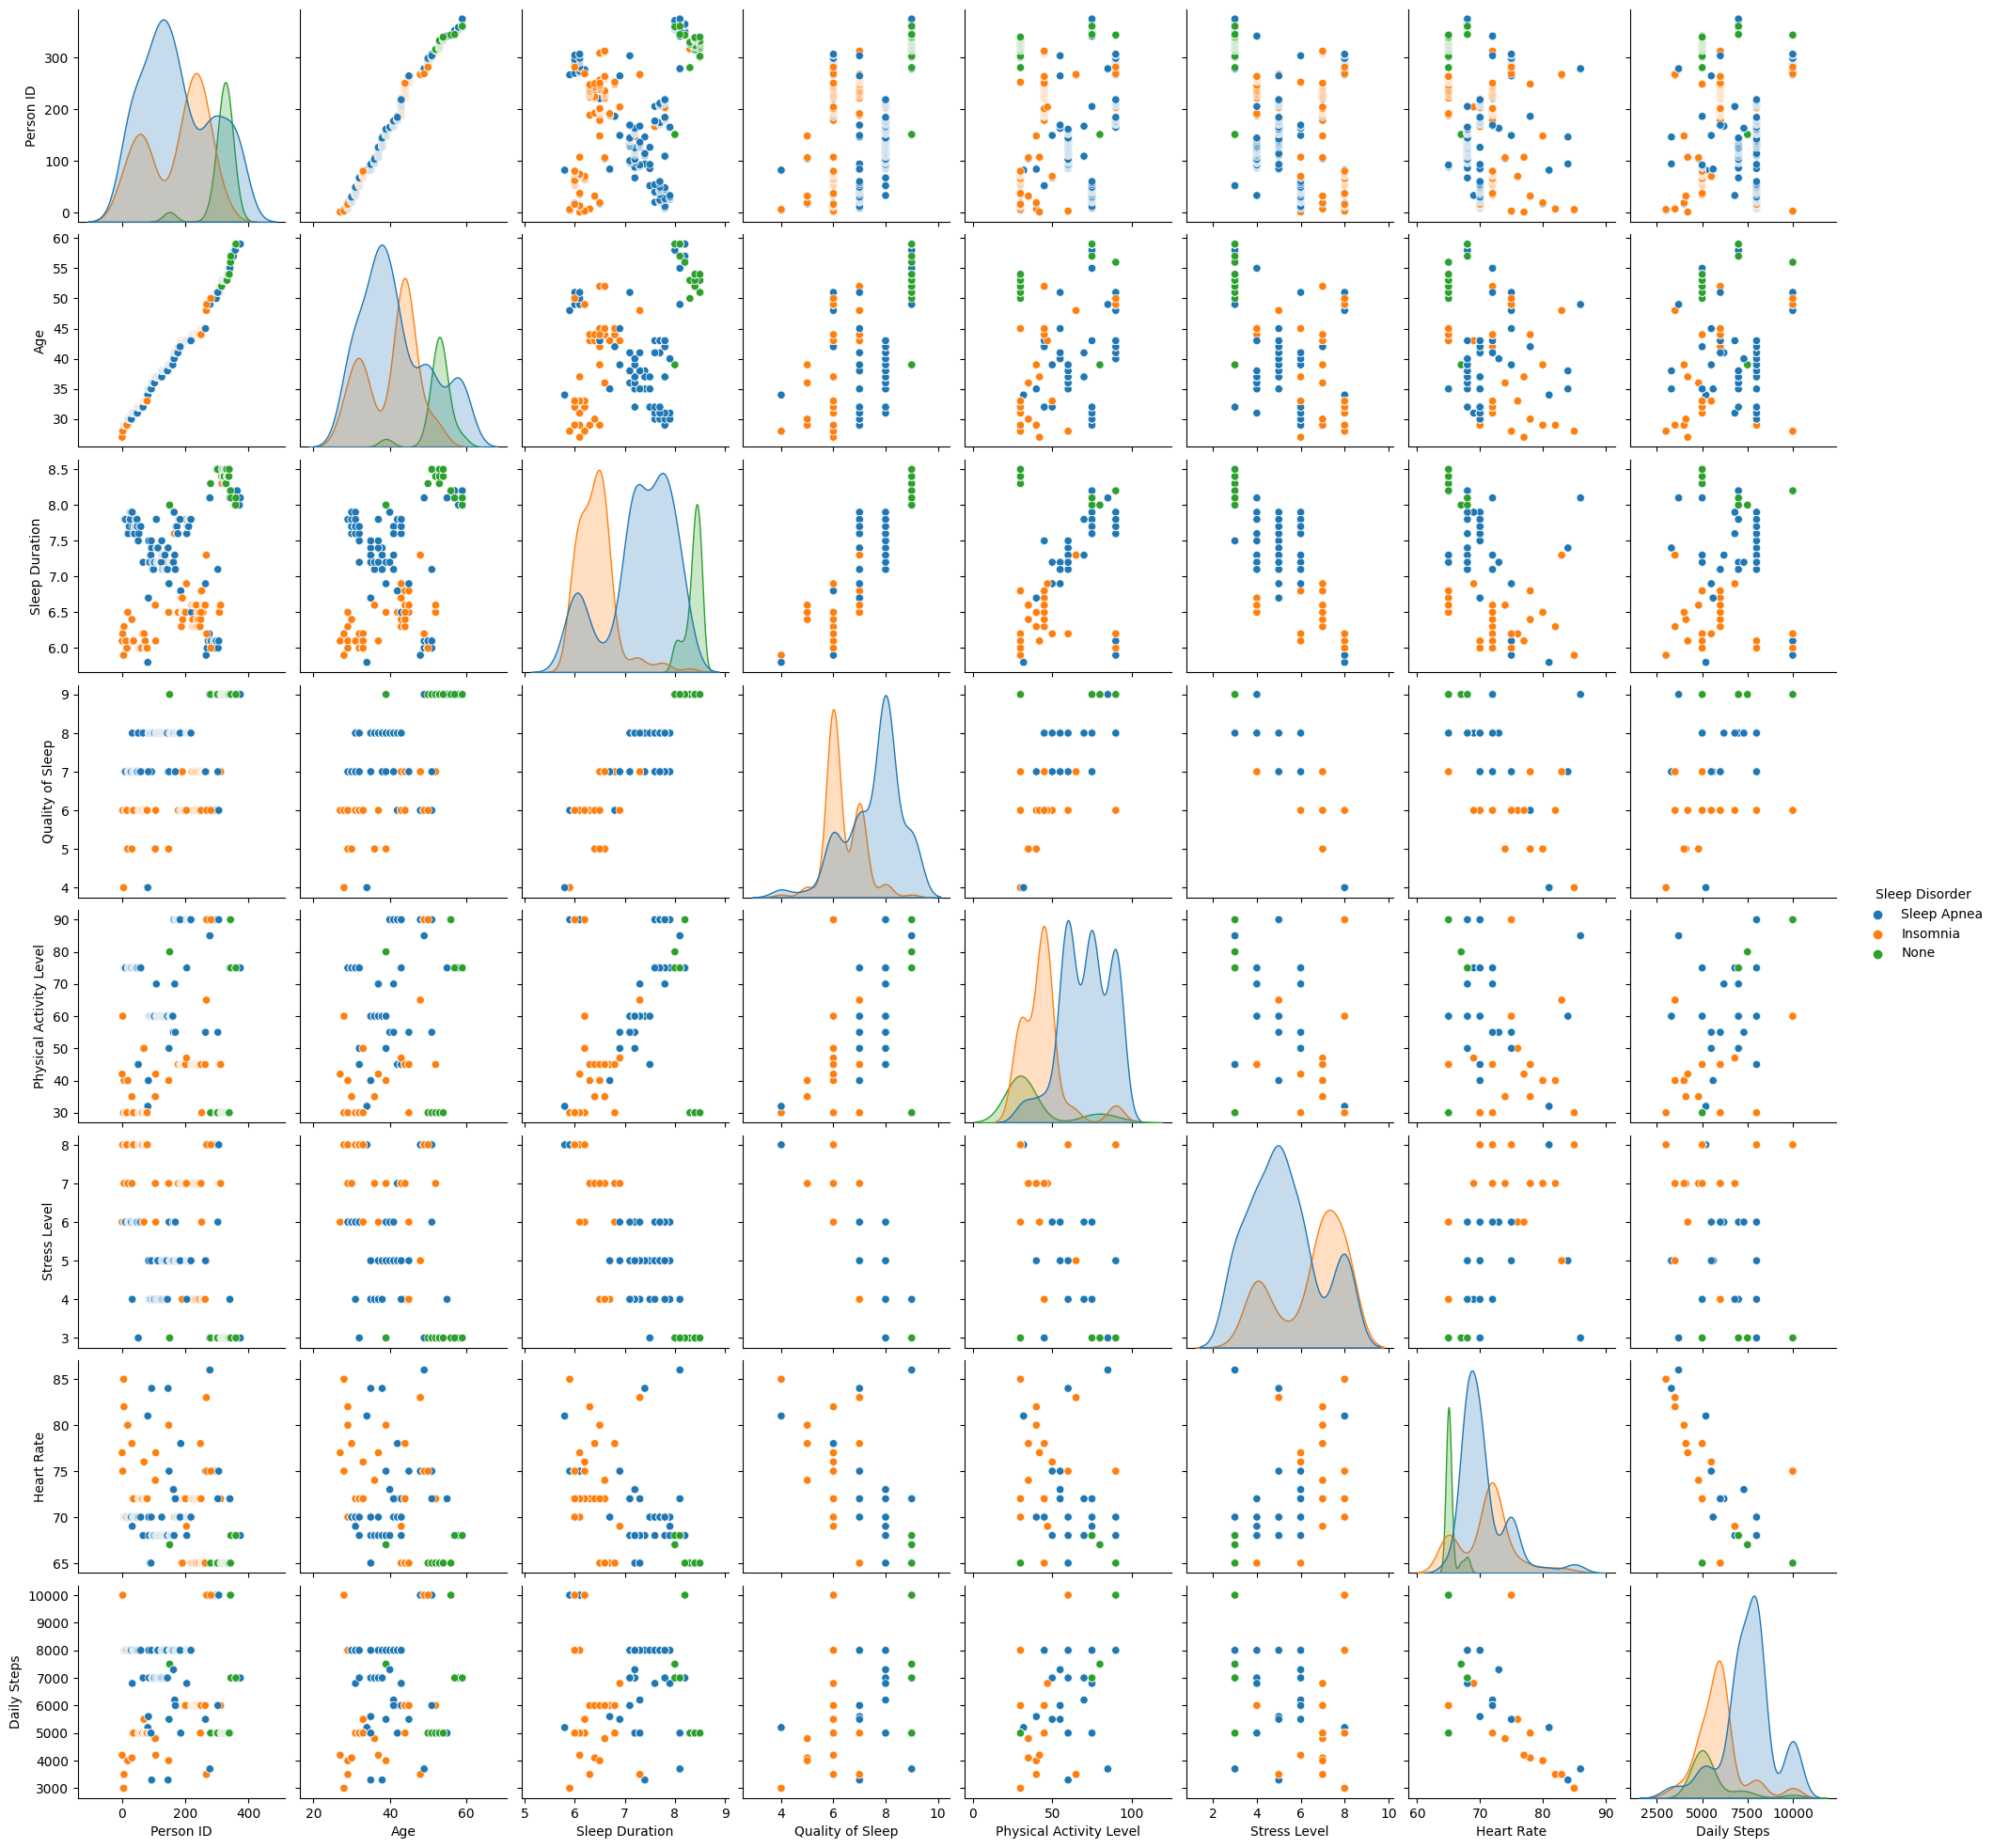

In [86]:
sns.pairplot(data=df, hue='Sleep Disorder')

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


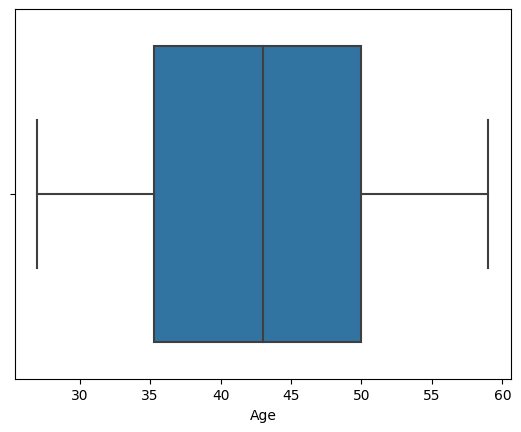

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


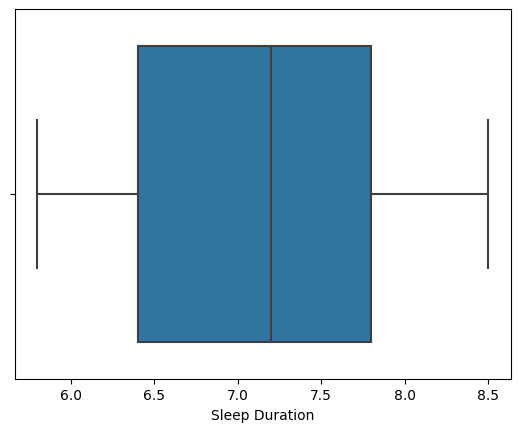

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


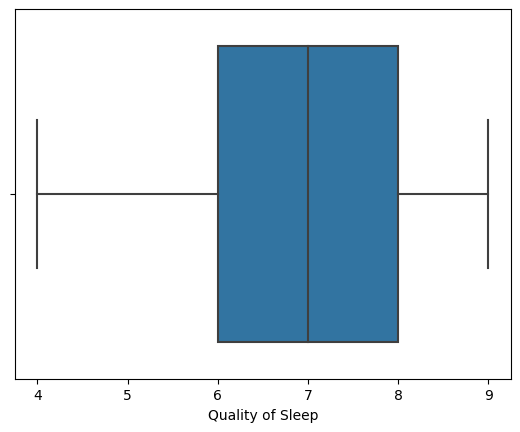

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


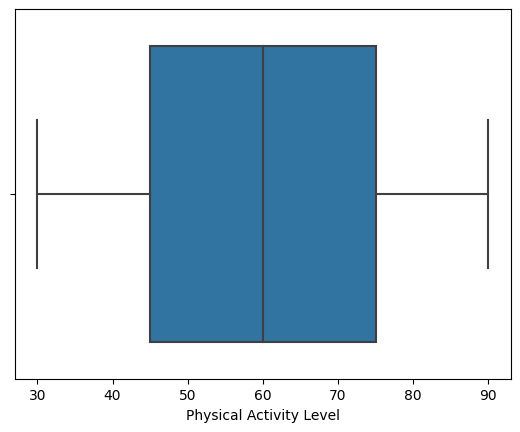

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


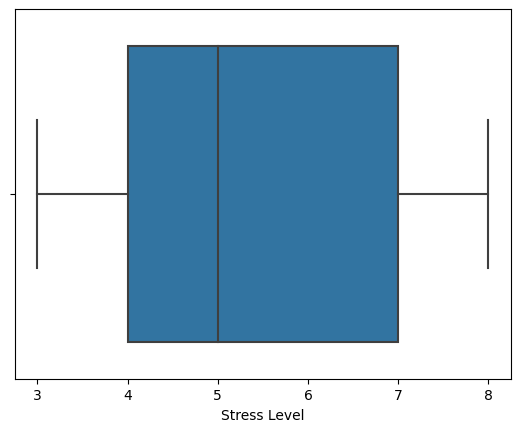

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


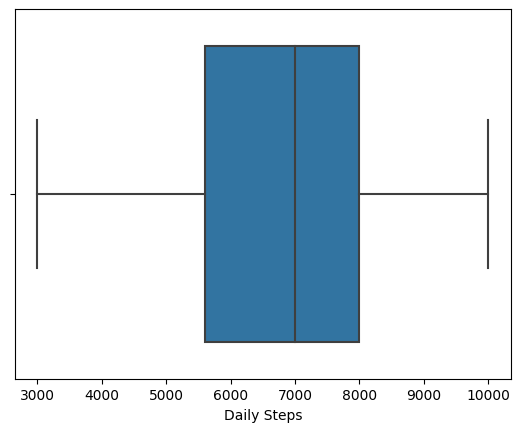

C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


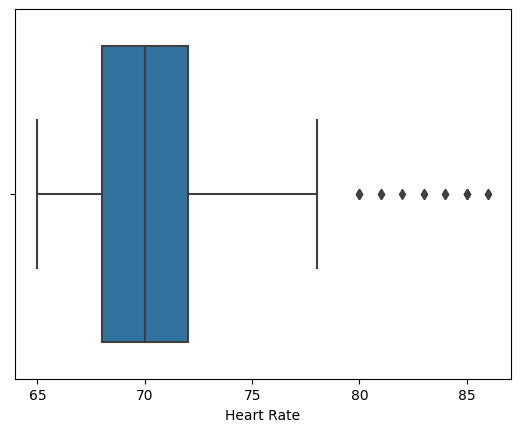

In [87]:
column = df[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Daily Steps','Heart Rate']]
for c in column.columns:
    plt.figure()
    sns.boxplot(x = c, data = column, orient = "v")
    plt.show()

# Question :

# 1. Berapa banyak dari mengidap Sleep disorder berdasarkan masing masing kategori?

  Sleep Disorder  count
0    Sleep Apnea    217
1       Insomnia    119
2           None     38


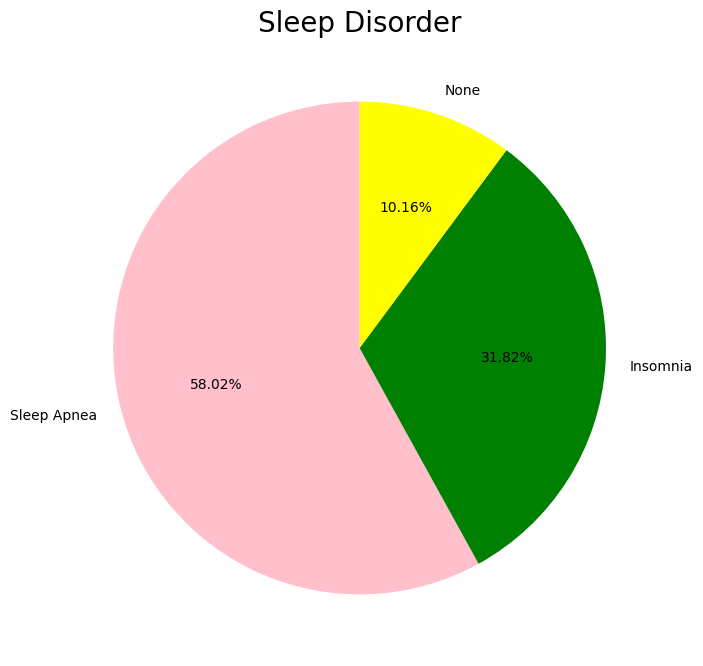

In [88]:
sleep = df['Sleep Disorder'].value_counts().reset_index()
plt.figure(figsize=(10,8))
plt.pie(sleep['count'],labels=sleep['Sleep Disorder'],
        startangle=90,autopct='%1.2f%%',
        colors=['pink','Green','Yellow'])
plt.title('Sleep Disorder',fontsize=20)
print(sleep)
plt.show()

## Jawaban dan Kesimpulan
### masing masing kategori terbilang seimbang secara persentase, namun secara jumlah, kategori Insomnia dengan nilai yang tertinggi sebesar 216, di ikuti Sleep Apnea(258), dan None (38)

# 3. Berdasarkan Occupation (jenis pekerjaan), berapa banyak yang mengidap Sleep disorder berdasarkan 3 kategori diatas?

              Occupation  count
0                  Nurse     73
1                 Doctor     71
2               Engineer     63
3                 Lawyer     47
4                Teacher     40
5             Accountant     37
6            Salesperson     32
7      Software Engineer      4
8              Scientist      4
9   Sales Representative      2
10               Manager      1


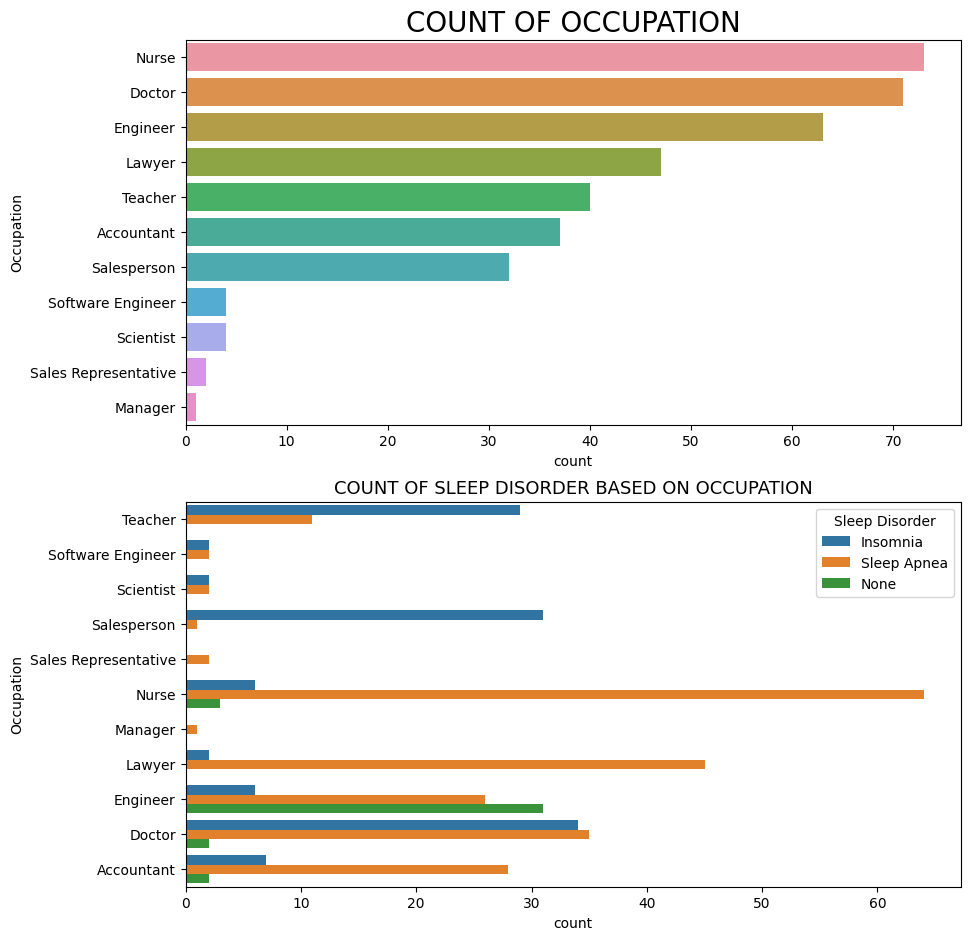

In [89]:
occupation = df['Occupation'].value_counts().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(nrows=2, ncols= 1, figsize=(10,11))
sns.barplot(x='count',y='Occupation',data=occupation,ax=ax[0])
ax[0].set_title('COUNT OF OCCUPATION',fontsize=20)
sns.countplot(y='Occupation',data=df.sort_values(by='Occupation',ascending=False),hue='Sleep Disorder',ax=ax[1])
ax[1].set_title('COUNT OF SLEEP DISORDER BASED ON OCCUPATION',fontsize=13)
print(occupation)
plt.show()

### Secara jumlah masing masing sleep disorder berdasarkan jenis pekerjaan, Nurse cukup mendominasi terindikasi penyakit Sleep Apnea, Diikuti dengan Enginer dan Doctor. Bagian Insomnia di dominasi dengan Dokter, diikuti dengan Sales Person, dan Teacher. Untuk lebih lengkap, mari kita lihat jumlah masing masing dengan pivot table 

In [90]:
pd.pivot_table(df,
              index='Sleep Disorder',
              columns='Occupation',
              values='Person ID',
              aggfunc='count',
              fill_value=0).reset_index()

Occupation,Sleep Disorder,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,Insomnia,7,34,6,2,0,6,0,31,2,2,29
1,None,2,2,31,0,0,3,0,0,0,0,0
2,Sleep Apnea,28,35,26,45,1,64,2,1,2,2,11


# 3. Berdasarkan Gender (jenis Kelamin), berapa banyak yang mengidap Sleep disorder berdasarkan 3 kategori?
# 4. Berdasarkan Gender (Jenis Kelamin), berapa total jumlah dari masing masing jenis pekerjaan mereka?

In [91]:
pd.pivot_table(df,
              index='Sleep Disorder',
              columns='Gender',
              values='Person ID',
              aggfunc='count',
              fill_value=0).reset_index()

Gender,Sleep Disorder,Female,Male
0,Insomnia,43,76
1,None,38,0
2,Sleep Apnea,104,113


In [92]:
pd.pivot_table(df,
              index='Gender',
              columns='Occupation',
              values='Person ID',
              aggfunc='count',
              fill_value=0).reset_index()

Occupation,Gender,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,Female,36,2,32,2,1,73,0,0,4,0,35
1,Male,1,69,31,45,0,0,2,32,0,4,5


   Gender  count
0    Male    189
1  Female    185


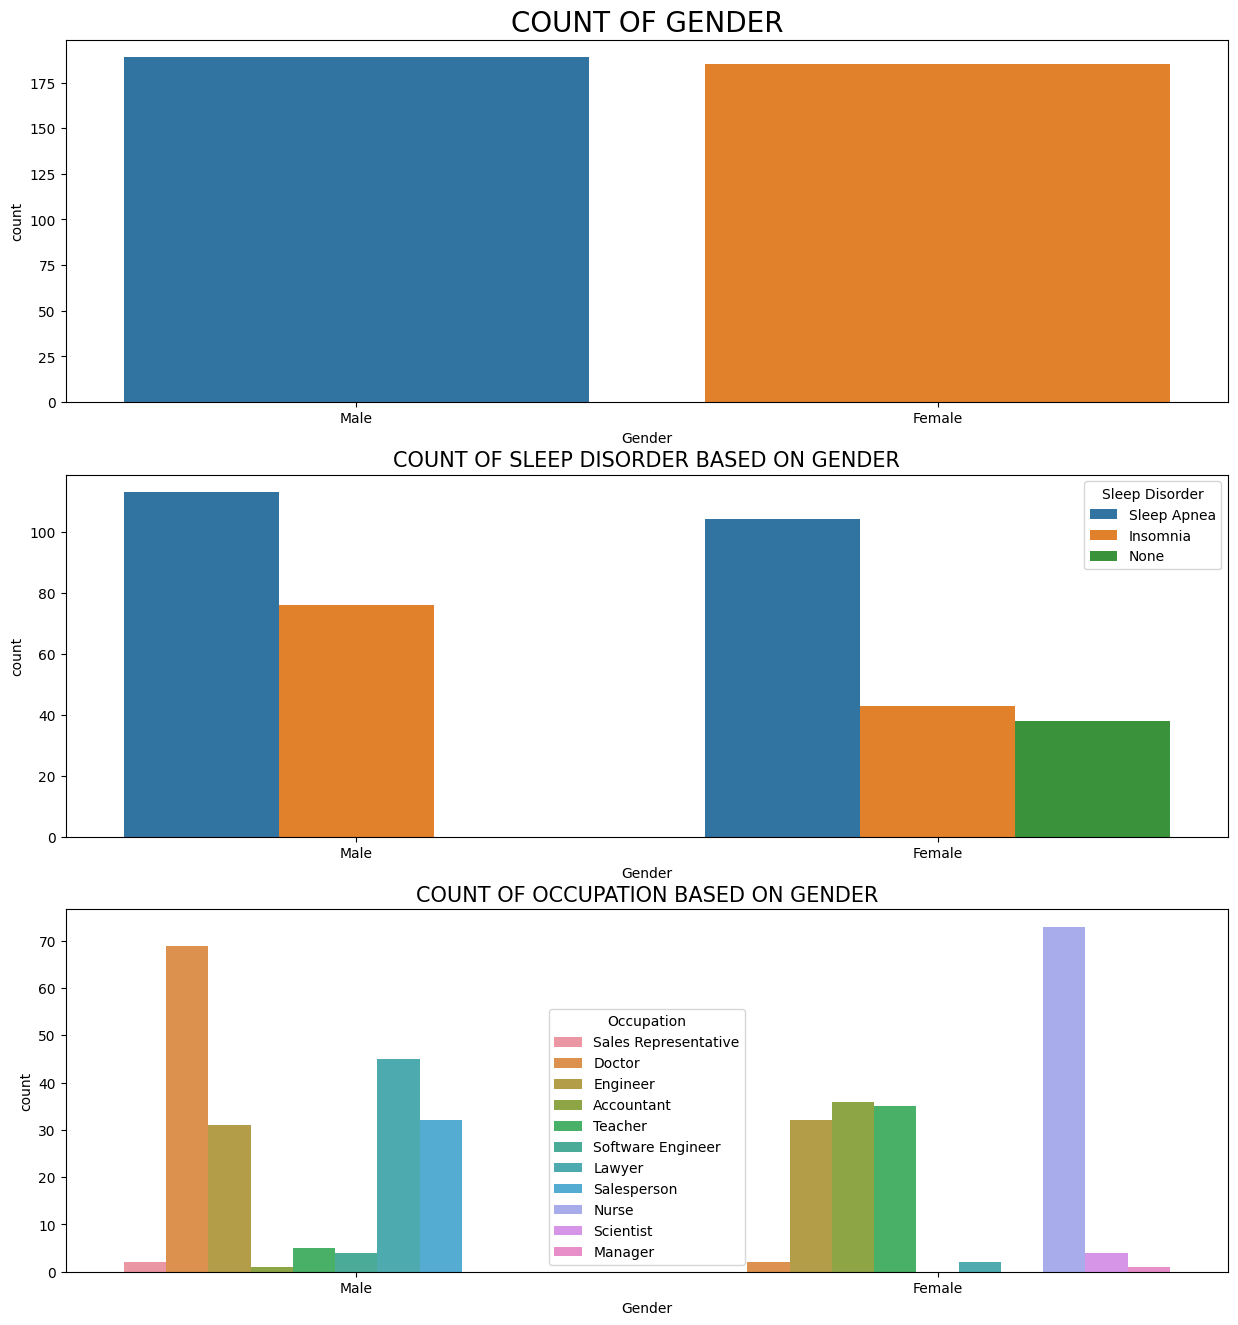

In [93]:
column = df[['Gender','Sleep Disorder']]
di = [column]
Gender = df['Gender'].value_counts().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(nrows=3, ncols= 1, figsize=(15,16))
sns.barplot(y='count',x='Gender',data=Gender,ax=ax[0])
ax[0].set_title('COUNT OF GENDER',fontsize=20)
sns.countplot(x='Gender',data=df.sort_values(by='Gender',ascending=False),hue='Sleep Disorder',ax=ax[1])
ax[1].set_title('COUNT OF SLEEP DISORDER BASED ON GENDER',fontsize=15)
sns.countplot(x='Gender',data=df.sort_values(by='Gender',ascending=False),hue='Occupation',ax=ax[2])
ax[2].set_title('COUNT OF OCCUPATION BASED ON GENDER',fontsize=15)
print(Gender)
plt.show()

### Secara Jumlah, Male(laki laki) dan Female (Wanita) memilki selisih yang cukup tipis. Namun secara kesehatan tidur, Wanita cenderung memiliki gangguan tidur, dan di dominasi Sleep Apnea. Diikuti Insomnia di dominasi oleh Male(Laki Laki). Relate dengan jenis perkejaan yang di dominasi Nurse(Female) dan Dokter (Male). Secara jenis pekerjaan, Sistem pekerjaan di rumah sakit harus berjalan 24 jam. tidak bisa di pungkiri pekerjaan di Rumah Sakit lebih mendominasi gangguan tidur.

# 5. Gangguan Tidur apa yang didominasi berdasarkan Frequency dari Umur, Detak Jantung, Stress Level??

## VISUALIZATION

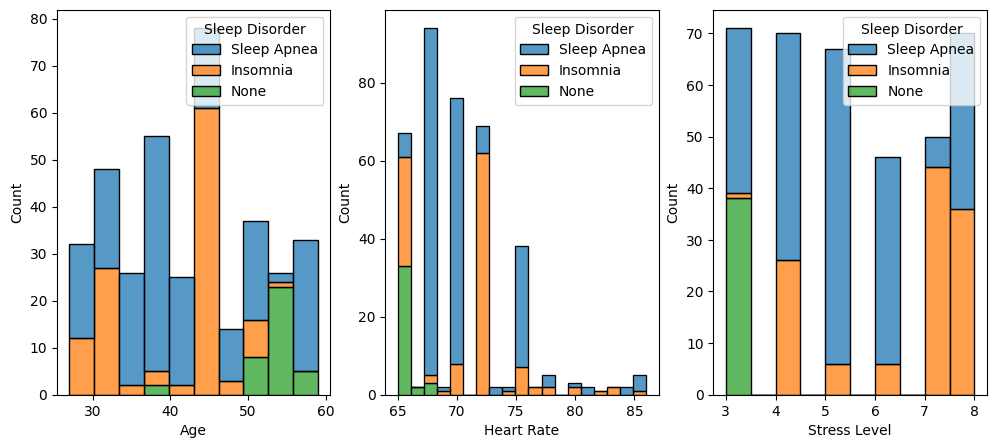

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
sns.histplot(data=df,x='Age',hue='Sleep Disorder',multiple='stack',ax=ax[0])
sns.histplot(data=df,x='Heart Rate',hue='Sleep Disorder', multiple='stack',ax=ax[1])
sns.histplot(data=df,x='Stress Level',hue='Sleep Disorder', multiple='stack',ax=ax[2])
plt.show()

## jawaban dan kesimpulan :
#### Berdasarkan Umur, data ini di dominasi umur Rentang Usia 25 - 45 dan cenderung memilki gangguan tidur (Sleep Apnea). Pada rentang umur 46 - 60, memiliki gangguan tidur(Insomnia) yang cukup mendominasi, sangat tipis sekali kemungkinan mereka untuk memilki kesehatan tidur. Berdasarkan Detak Jantung, frequency 70 cenderung mendominasi gangguan Tidur (Sleep Apnea). Diikuti fequency 65. Berdasarkan Tingkat stress bagian terkecil dan terbesar justru memiiki gangguan tidur. yah, Benar. Tingkat stres memang akan berpengaruh pada gangguan tidur kita. sama seperti kita overthinking pada sesuatu hal, kita akan susah untuk tidur dan terus terganggu oleh fikiran untuk menyelesaikan masalah yang kita hadapi. Nah apa saja sih pekerjaan masing masing mereka ? Kamu bisa lihat informasi visualisasinya dibawah ini.

## VISUALIZATION

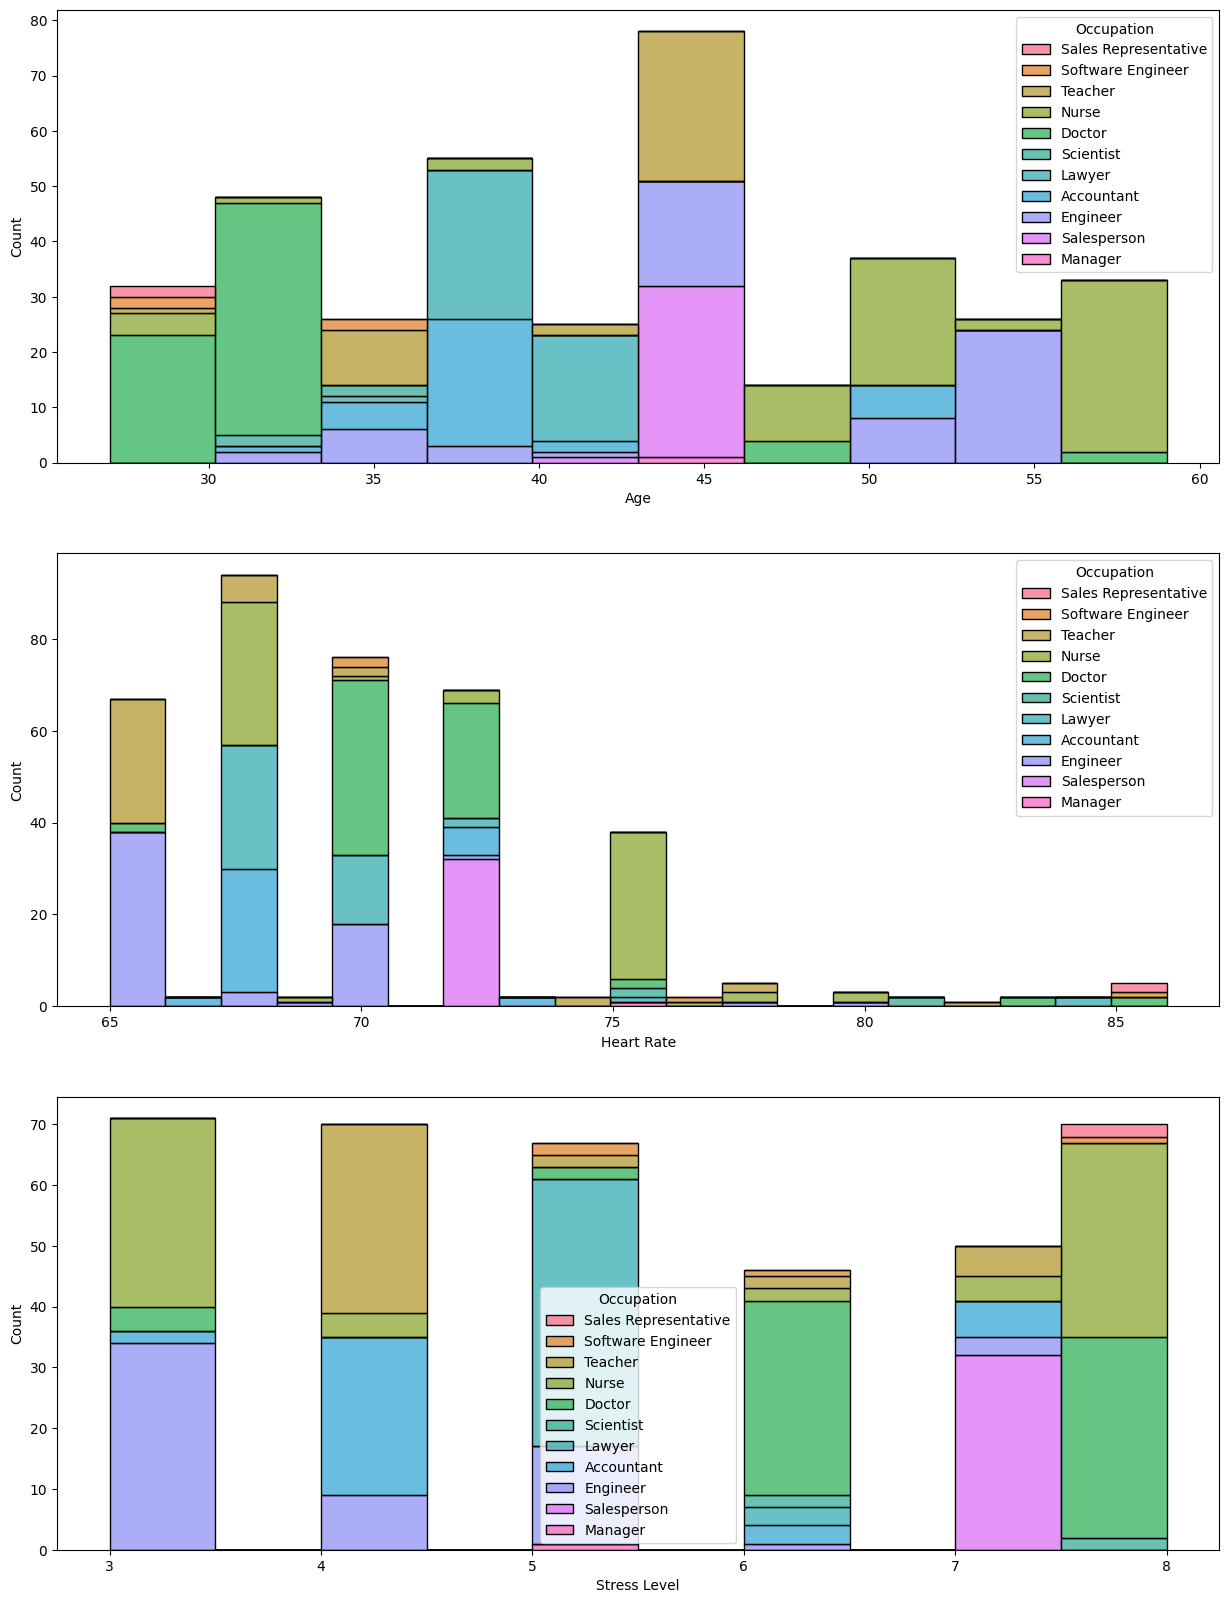

In [95]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,20))
sns.histplot(data=df,x='Age',hue='Occupation',multiple='stack',ax=ax[0])
sns.histplot(data=df,x='Heart Rate',hue='Occupation', multiple='stack',ax=ax[1])
sns.histplot(data=df,x='Stress Level',hue='Occupation', multiple='stack',ax=ax[2])
plt.show()

# 6. Gangguan Tidur apa yang didominasi berdasarkan Frequency dari Durasi Tidur/jam, Aktivitas langkah, Tingkat Aktivitas Fisik??

## Visualization

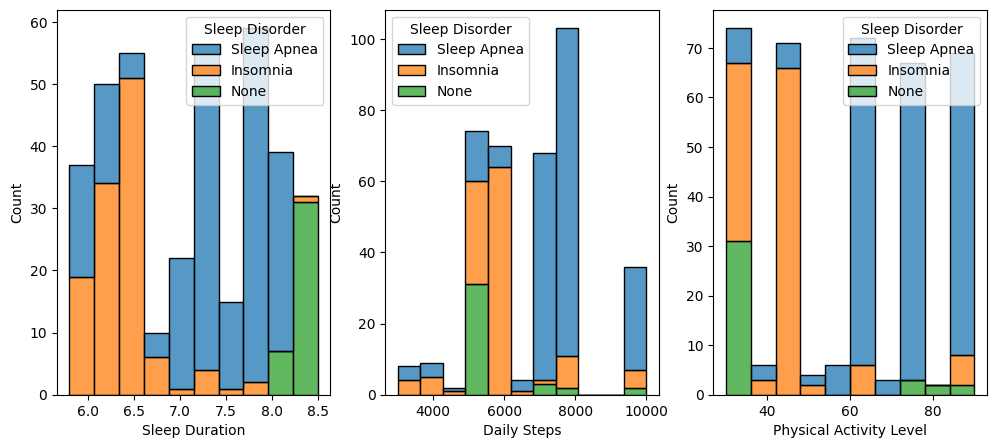

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
sns.histplot(data=df,x='Sleep Duration',hue='Sleep Disorder', multiple='stack',ax=ax[0])
sns.histplot(data=df,x='Daily Steps',hue='Sleep Disorder', multiple='stack',ax=ax[1])
sns.histplot(data=df,x='Physical Activity Level',hue='Sleep Disorder', multiple='stack',ax=ax[2])
plt.show()

## Jawaban dan Kesimpulan
### Terlihat pada Bagian Durasi Tidur paling rendah di dominasi gangguan tidur, tetapi unik nya durasi tidur yang  tinggi juga memilki gangguan tidur (Sleep Apnea), yah. Insomnia dan Sleep Apnea memiliki gangguan tidur yang berbeda, Insomnia adalah sulit untuk tidur, Tetapi Sleep Apnea adalah gangguan pada proses tidur. Pada bagian langkah aktifitas  dan tingkat aktifitas fisik tidak merepresentasi kan apakah mereka memilki gangguan atau tidak. hal ini bisa di dijelaskan pada jenis pekerjaan dan beban pekerjaan tidak diukur dari langkah aktifitas mereka. dan apa saja pekerjaan mereka berdasark kan distribusi diatas?? kita bisa lihat visualisasi berikut

## VISUALIZATION

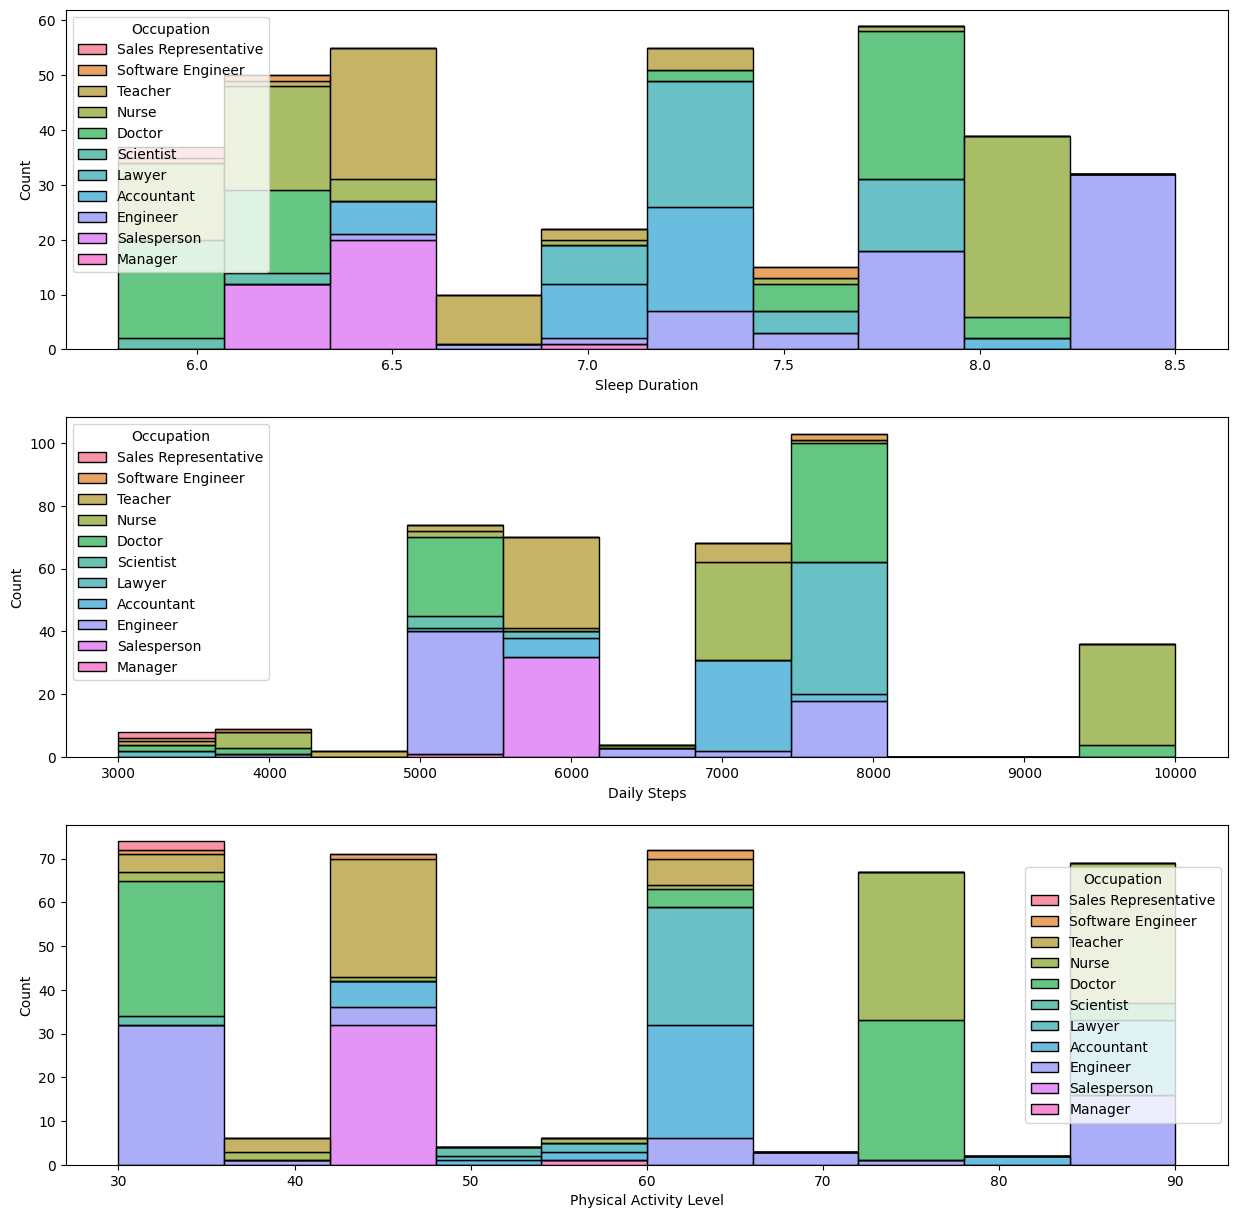

In [97]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
sns.histplot(data=df,x='Sleep Duration',hue='Occupation', multiple='stack',ax=ax[0])
sns.histplot(data=df,x='Daily Steps',hue='Occupation', multiple='stack',ax=ax[1])
sns.histplot(data=df,x='Physical Activity Level',hue='Occupation', multiple='stack',ax=ax[2])
plt.show()

# 7. Gangguan Tidur apa yang didominasi berdasarkan Tekanan Darah??

<Axes: xlabel='count', ylabel='Blood Pressure'>

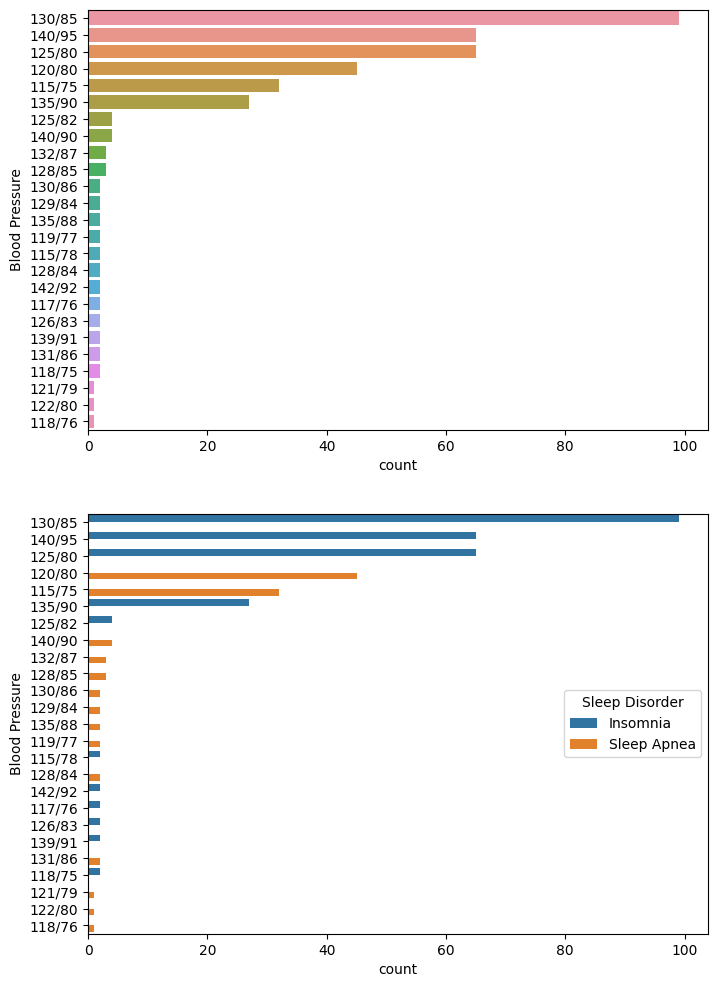

In [98]:
Blood = df['Blood Pressure'].value_counts().sort_values(ascending=False).reset_index()
Blood['Sleep Disorder'] = df['Sleep Disorder']
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(8,12))
sns.barplot(x='count',y='Blood Pressure',data=Blood.sort_values(by='count',ascending=False),ax=ax[0])
sns.barplot(x='count',y='Blood Pressure',data=Blood.sort_values(by='count',ascending=False),hue='Sleep Disorder',ax=ax[1])

### Mari kita sederhana kan dengan mengambil tekanan darah yang memiliki gangguan Tidur

<Axes: xlabel='count', ylabel='Blood Pressure'>

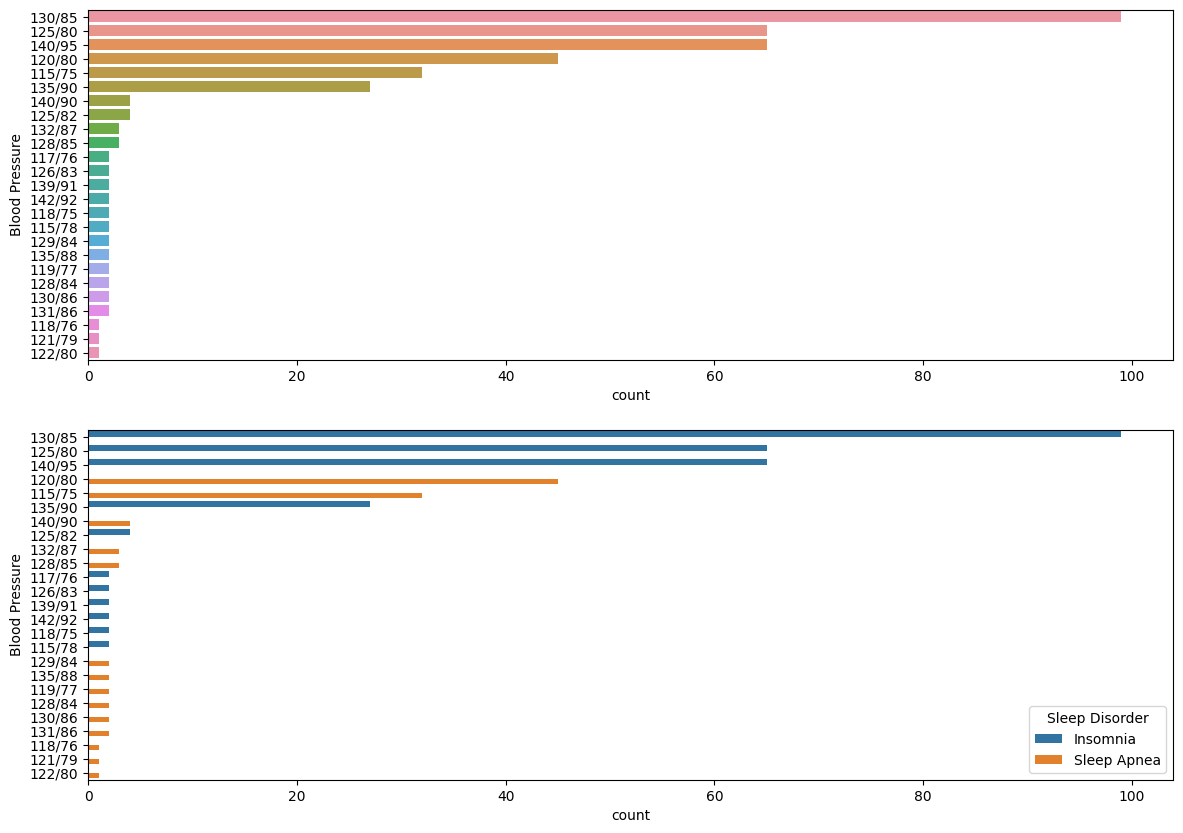

In [99]:
Blood1 = Blood.loc[(Blood['Sleep Disorder']=='Sleep Apnea')]
Blood2 = Blood.loc[(Blood['Sleep Disorder']=='Insomnia')]
Blood = pd.concat([Blood1,Blood2])
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(14,10))
sns.barplot(x='count',y='Blood Pressure',data=Blood.sort_values(by='count',ascending=False),ax=ax[0])
sns.barplot(x='count',y='Blood Pressure',data=Blood.sort_values(by='count',ascending=False),hue='Sleep Disorder',ax=ax[1])

In [100]:
pd.pivot_table(df,
              index='Blood Pressure',
              columns='Sleep Disorder',
              values='Person ID',
              aggfunc='count',
              fill_value=0)

Sleep Disorder,Insomnia,None,Sleep Apnea
Blood Pressure,,,
115/75,1,0,31
115/78,0,2,0
117/76,1,0,1
118/75,0,2,0
118/76,0,0,1
119/77,0,0,2
120/80,5,0,40
121/79,0,0,1
122/80,0,0,1


# KESIMPULAN SEDERHANA

#### Berdasarkan analisis, terdapat beberapa temuan menarik yang dapat diambil sebagai kesimpulan. 

#### Pertama, gangguan tidur pada dataset ini terbagi menjadi tiga kategori utama, yaitu Insomnia, Sleep Apnea, dan None. Insomnia merupakan gangguan tidur yang paling dominan dengan sekitar 58,3% dari total kasus gangguan tidur, diikuti oleh Sleep Apnea dengan 32,3%, dan sebagian kecil tidak memiliki gangguan tidur. 

#### Kedua, dari segi pekerjaan, perawat (Nurse) dan dokter (Doctor) cenderung lebih rentan terhadap gangguan tidur, dengan Sleep Apnea menjadi gangguan tidur yang paling umum di antara mereka. 

#### Ketiga, berdasarkan jenis kelamin, wanita memiliki frekuensi gangguan tidur yang sedikit lebih tinggi daripada pria, dengan Sleep Apnea sebagai gangguan tidur yang paling umum pada wanita dan Insomnia pada pria.  

#### Terakhir, dalam analisis berdasarkan usia, terlihat bahwa rentang usia 25 hingga 45 tahun memiliki jumlah kasus gangguan tidur yang lebih tinggi, dengan Sleep Apnea mendominasi di rentang usia tersebut. Tingkat detak jantung dan tingkat stres juga memengaruhi jenis gangguan tidur yang dialami, dengan tingkat stres yang lebih tinggi cenderung terkait dengan Sleep Apnea. Temuan ini dapat menjadi landasan untuk lebih memahami faktor-faktor yang memengaruhi gangguan tidur dan mengambil tindakan pencegahan yang sesuai.

## 

# REKOMENDASI

Berdasarkan analisis data yang telah diuraikan sebelumnya, ada beberapa rekomendasi yang dapat dipertimbangkan untuk analisis lebih lanjut:

1. **Studi Mendalam tentang Insomnia:** Mengingat Insomnia merupakan gangguan tidur yang paling dominan dalam dataset, penelitian lebih lanjut tentang penyebab, gejala, dan pengelolaan Insomnia dapat membantu dalam pengembangan strategi pencegahan dan penanganan yang lebih efektif.

2. **Penelitian Khusus pada Kelompok Profesi:** Dalam dataset, perawat (Nurse) dan dokter (Doctor) tampak lebih rentan terhadap gangguan tidur. Analisis lebih lanjut tentang faktor-faktor yang mungkin memengaruhi gangguan tidur di kalangan tenaga medis dan solusi yang sesuai perlu dipertimbangkan.

3. **Faktor-faktor Lingkungan:** Mengingat tingkat detak jantung dan tingkat stres memengaruhi jenis gangguan tidur, penelitian lebih lanjut tentang faktor-faktor lingkungan yang dapat mempengaruhi tidur, seperti polusi suara atau cahaya di tempat kerja atau rumah, dapat membantu dalam merancang lingkungan yang lebih kondusif untuk tidur yang berkualitas.

4. **Pengembangan Program Pencegahan:** Berdasarkan analisis data usia dan jenis kelamin, program pencegahan yang disesuaikan untuk kelompok-kelompok yang rentan seperti wanita usia 25-45 tahun dapat dikembangkan. Ini dapat mencakup edukasi tentang tidur yang baik dan praktik yang sehat.

5. **Monitoring Terus-menerus:** Data ini dapat digunakan untuk mendirikan sistem pemantauan terus-menerus terhadap gangguan tidur dan kesejahteraan tidur populasi. Informasi ini dapat membantu dalam mengidentifikasi tren dan perubahan dalam masalah tidur seiring waktu.

